In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/home/user/Downloads/MP/HR/train_LZdllcl.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
data.shape

(54808, 14)

In [4]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
data.describe(include='O')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
missing_value = data.isna().sum()[data.isna().sum()>0]
missing_value

education               2409
previous_year_rating    4124
dtype: int64

In [11]:
missing_value_per = data.isna().sum()[data.isna().sum()>0]*100/data.shape[0]
missing_value_per

education               4.395344
previous_year_rating    7.524449
dtype: float64

In [12]:
missing_obj = data[data.dtypes[data.dtypes==object].index].isna().sum()[(data.isna().sum()>0)].index
missing_obj

Index(['education'], dtype='object')

In [13]:
missing_flot = data[data.dtypes[data.dtypes=='float64'].index].isna().sum()[(data.isna().sum()>0)].index
missing_flot

Index(['previous_year_rating'], dtype='object')

In [14]:
for x in missing_obj:
    mode_value = data[x].mode()[0]
    data[x]= data[x].fillna(mode_value)

In [15]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
for x in missing_flot:
    mean_value = data[x].mean()
    data[x]=data[x].fillna(mean_value)

In [17]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
numcols = data.dtypes.drop(['is_promoted','no_of_trainings','awards_won?'])[(data.dtypes=='int64') | (data.dtypes=='float64')].index
numcols

Index(['employee_id', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'avg_training_score'],
      dtype='object')

In [21]:
numcols1 = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index
numcols1

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

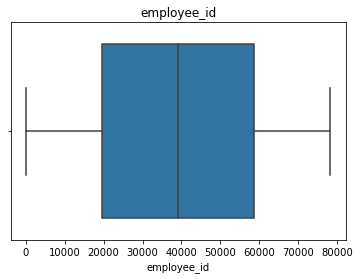

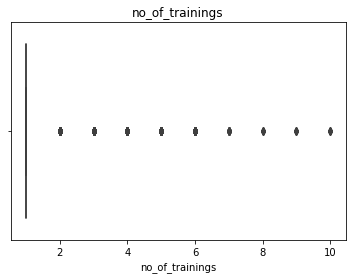

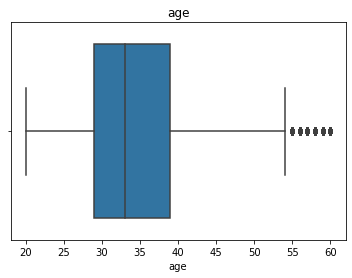

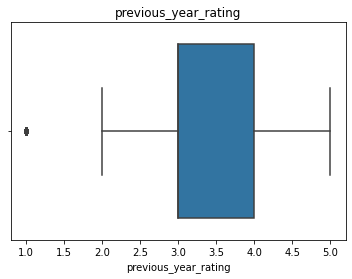

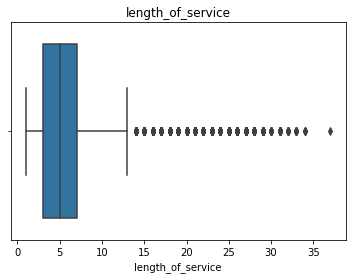

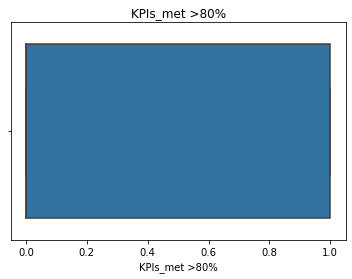

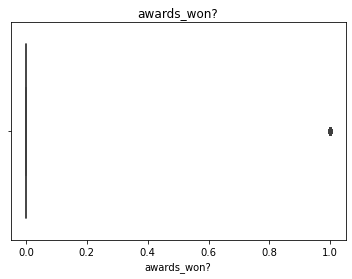

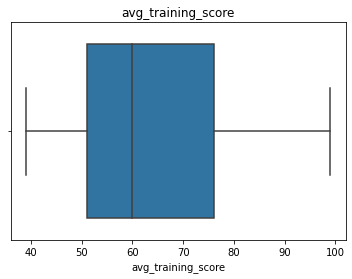

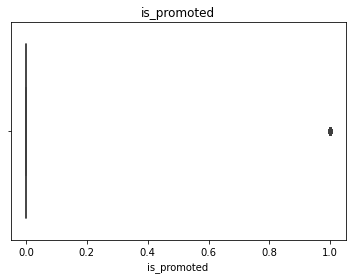

In [22]:
for x in numcols1:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

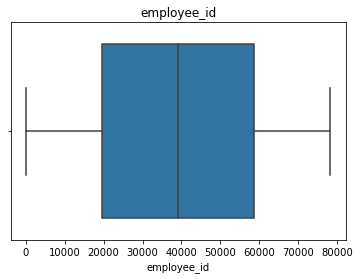

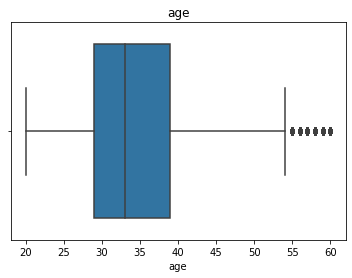

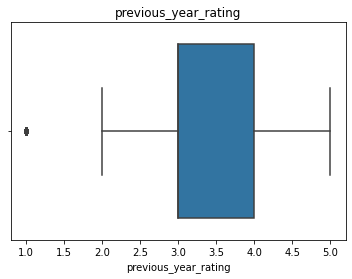

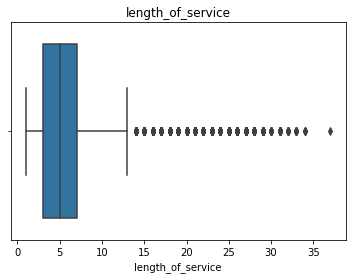

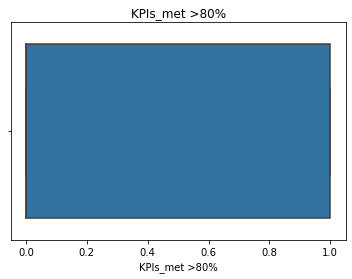

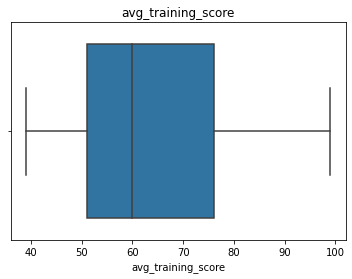

In [23]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [24]:
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit

employee_id
age
previous_year_rating
length_of_service
KPIs_met >80%
avg_training_score


<ipython-input-24-0318679037a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit] = upper_limit
<ipython-input-24-0318679037a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit] = lower_limit
<ipython-input-24-0318679037a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit] = upper_limit
<ipython-input-24-0318679037a9>:9: SettingWithCopyWarning: 
A value

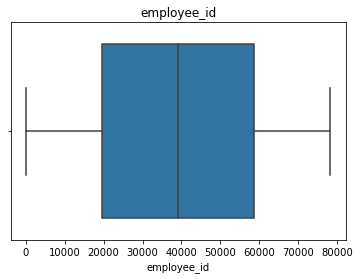

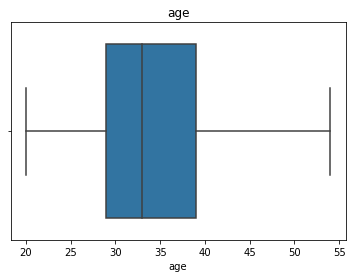

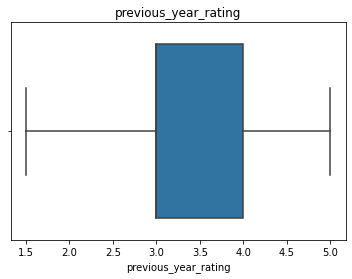

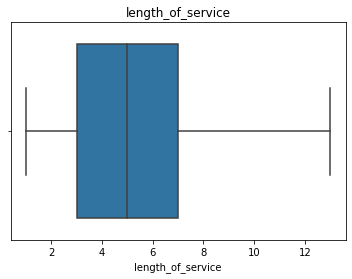

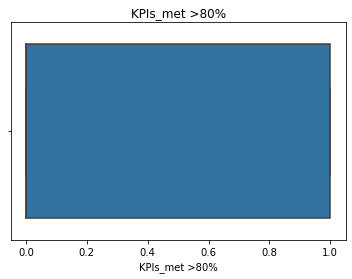

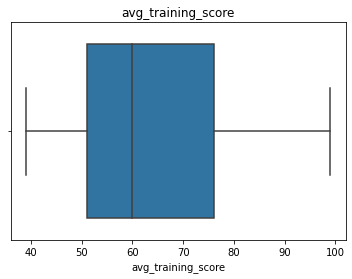

In [25]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [26]:
data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.5,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [27]:
data = pd.get_dummies(data)

In [28]:
data.head(10)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.5,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0
5,58896,2,31,3.0,7,0,0,85,0,1,...,0,0,1,0,0,0,1,0,0,1
6,20379,1,31,3.0,5,0,0,59,0,0,...,0,0,1,0,0,1,0,1,0,0
7,16290,1,33,3.0,6,0,0,63,0,0,...,0,0,0,0,1,0,1,0,0,1
8,73202,1,28,4.0,5,0,0,83,0,1,...,0,0,1,0,0,0,1,1,0,0
9,28911,1,32,5.0,5,1,0,54,0,0,...,0,0,0,0,1,0,1,0,0,1


In [29]:
data.shape

(54808, 60)

In [30]:
y = data['is_promoted']
X = data.drop('is_promoted',axis=1)

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [32]:
X.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.5,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.38,random_state=50)


In [34]:
y_train.shape

(33980,)

In [35]:
X_train.shape

(33980, 59)

In [36]:
X_test.shape

(20828, 59)

In [37]:
y_test.shape

(20828,)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.916218551949299

In [41]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# SMOTE


In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =42)
X_smote,y_smote =sm.fit_resample(X_train,y_train)

In [43]:
y_smote.shape

(62114,)

In [44]:
X_smote.shape

(62114, 59)

In [45]:
y_smote.value_counts()

1    31057
0    31057
Name: is_promoted, dtype: int64

In [46]:
classifier.fit(X_smote,y_smote)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred_smote = classifier.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_smote)

0.736316497023238

# Standardization

In [49]:
#from sklearn.preprocessing  import StandardScaler
#scale = StandardScaler()
#scaled_x = scale.fit_transform(X)

In [50]:
#type(scaled_x)

In [51]:
#scaled_x.shape

In [52]:
#X_train,y_train,X_test,y_test=train_test_split(scaled_x,y,random_state =40,test_size =0.38)
#classifier=LogisticRegression()
#classifier.fit(X_train,y_train)

# Normalization(minmaxscalar)


In [53]:
# # from sklearn.preprocessing import StandardScaler

# SS = StandardScaler() 
# SS.fit_transform(data)

In [54]:
# from sklearn.preprocessing import MinMaxScaler  #Normalization
# MinMaxScaler().fit_transform(d1)

# Random forest

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38,random_state=42) #0.67 data will be for trainin

In [57]:
n_estimators = [15,25,45,65,85]
criterion = ['gini','entropy']
max_depth =[3,5,10,15]
parameters={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}

In [58]:
?RandomForestClassifier


In [59]:
rfc_cls = GridSearchCV(rf_cls,parameters)
rfc_cls.fit(X_smote,y_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'n_estimators': [15, 25, 45, 65, 85]})

In [60]:
rfc_cls.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 85}

In [61]:
classifier.fit(X_train,y_train)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
rf_cls=RandomForestClassifier( n_estimators= 15,criterion= 'entropy', max_depth= 15)
rf_cls.fit(X_smote,y_smote)

y_pred_rm = rf_cls.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred_rm)

0.9443057422700212

In [64]:
rf_cls1=RandomForestClassifier( n_estimators= 15,criterion= 'entropy', max_depth= 15)
rf_cls1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=15)

In [65]:
y_pred_rmm = rf_cls.predict(X_test)
accuracy_score(y_test,y_pred_rmm)

0.9443057422700212

In [66]:
from scipy.stats import entropy
entropy([5, 5], base=2)

1.0

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rmm)

array([[19019,   102],
       [ 1058,   649]])

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rm)

array([[19019,   102],
       [ 1058,   649]])

In [69]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_rm
Results['Id']=Results.index
Results.head(10)

,Actual,Predicted,Id
40907,0,0,40907
51939,0,0,51939
6978,0,0,6978
12814,0,0,12814
22921,0,0,22921
33215,0,0,33215
4028,0,0,4028
1390,0,0,1390
20735,1,0,20735
17224,0,0,17224


# SVM


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clss = SVC()

In [71]:
parameters={'C':[0.001,0.1],'gamma':[0.1,0.01],'kernel':['rbf']}

In [72]:
svclassifier = GridSearchCV(clss,parameters)
svclassifier.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf']})

In [73]:
svclassifier.best_params_

{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}

In [74]:
clss = SVC(C=0.001, gamma=0.1, kernel='rbf',probability=True)


In [75]:
clss.fit(X_train,y_train)

SVC(C=0.001, gamma=0.1, probability=True)

In [76]:
y_pred_sv=clss.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_sv)

0.9180430190128673

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19121
           1       0.00      0.00      0.00      1707

    accuracy                           0.92     20828
   macro avg       0.46      0.50      0.48     20828
weighted avg       0.84      0.92      0.88     20828



/home/user/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
